In [66]:
import torch
import torch.nn as nn
import torch.optim as optim

In [67]:
# Define hyperparameters

epochs = 30
learning_rate = 3
batch_size_train = 30
batch_size_test = 1

In [68]:
# Import the MNIST dataset and create traning and test data loaders

import torchvision

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                    download=True, transform=torchvision.transforms.ToTensor())
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, 
                    download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(mnist_trainset, 
                                    batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset, 
                                    batch_size=batch_size_test, shuffle=True)

In [69]:
# Define the neural network architecture and cost functions

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(784,30)
    self.fc2 = nn.Linear(30,10)

  def forward(self, x):
    x = x.view(-1, 784)
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    return x

net = Net()
criterion = nn.MSELoss()

In [70]:
# Define an evaluation function to evaluate the network against the test data

def evaluate():
  correct = 0
  for batch, (input, output) in enumerate(test_loader):
    if output == torch.argmax(net(input)):
      correct += 1
  correct_rate = 100*correct/len(test_loader)
  print("Success rate: %s%%" % correct_rate)

In [71]:
# Evaluate the initial network - this should give a success rate of about 10%

print("Evaluating...")
evaluate()

# Update the network using SGD and the chosen hyperparameters

optimizer = optim.SGD(net.parameters(), lr=learning_rate)

for epoch in range(1,epochs+1):
  print("Epoch %s" % epoch)
  print("Training...")
  for batch, (input, labels) in enumerate(train_loader):
    optimizer.zero_grad()
    output = net(input)
    target = torch.zeros_like(output)
    for index, label in zip(range(len(labels)), labels):
      target[index][label] = 1.
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
  print("Evaluating...")
  evaluate()

Evaluating...
Success rate: 11.35%
Epoch 1
Training...
Evaluating...
Success rate: 90.37%
Epoch 2
Training...
Evaluating...
Success rate: 92.27%
Epoch 3
Training...
Evaluating...
Success rate: 93.25%
Epoch 4
Training...
Evaluating...
Success rate: 93.62%
Epoch 5
Training...
Evaluating...
Success rate: 94.13%
Epoch 6
Training...
Evaluating...
Success rate: 94.18%
Epoch 7
Training...
Evaluating...
Success rate: 94.44%
Epoch 8
Training...
Evaluating...
Success rate: 94.69%
Epoch 9
Training...
Evaluating...
Success rate: 94.95%
Epoch 10
Training...
Evaluating...
Success rate: 94.99%
Epoch 11
Training...
Evaluating...
Success rate: 95.11%
Epoch 12
Training...
Evaluating...
Success rate: 95.2%
Epoch 13
Training...
Evaluating...
Success rate: 95.33%
Epoch 14
Training...
Evaluating...
Success rate: 95.37%
Epoch 15
Training...
Evaluating...
Success rate: 95.37%
Epoch 16
Training...
Evaluating...
Success rate: 95.58%
Epoch 17
Training...
Evaluating...
Success rate: 95.55%
Epoch 18
Training...
Ev

Label: tensor([3])
Network probabilities:
0: 0.001
1: 0.000
2: 0.481
3: 0.126
4: 0.001
5: 0.000
6: 0.013
7: 0.000
8: 0.028
9: 0.000


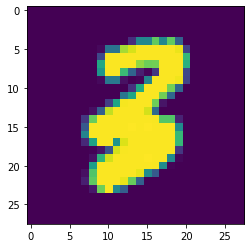

In [72]:
# Display an example where the network is making a mistake

import matplotlib.pyplot as plt

for batch, (input, target) in enumerate(test_loader):
  output = net(input)
  if target != torch.argmax(output):
    print("Label: %s" % target)
    print("Network probabilities:")
    for label in range(10):
      print("%s: %.3f" % (label, output[0][label]))
    plt.imshow(input.squeeze())
    break